In [1]:
import numpy as np
import preprocessing as pp

from graph import *
from bayesian_decision_evaluation import *
# import importlib
import models
from models.svm_classifier import SVMClassifier
from models.svm_kernel_classifier import SVMClassifierPolyKernel, SVMClassifierRBFKernel


In [2]:
X, y = utils.load_data()

classes = {
    'Fake': 'blue',
    'Real': 'orange'
}

X_train, y_train, X_test, y_test = utils.split_data(X, y)

In [3]:
def compute_statistics(llr, y_true, prior, unique_labels=None):
    cost_matrix, prior_class_prob, threshold = binary_cost_matrix(prior)
    
    min_DCF, best_threshold = compute_minDCF(llr, y_true, prior, unique_labels)
    y_pred = (llr > threshold) * 1
    y_pred_best = (llr > best_threshold) * 1
    cm = confusion_matrix(y_true, y_pred, unique_labels)
    cm_best = confusion_matrix(y_true, y_pred_best, unique_labels)
    acc = accuracy(cm_best)
    DCF, _, _ = compute_DCF(cm, cost_matrix, prior_class_prob)
    DCF_norm, _, _ = compute_DCF_normalized(cm, cost_matrix, prior_class_prob)
    
    print(f"MinDCF: {min_DCF:.4f}, DCF: {DCF:.4f}, Normalized DCF: {DCF_norm:.4f}, Accuracy: {acc*100:.2f}%\n")
    
    return min_DCF, DCF, DCF_norm

In [4]:
def plot_overall_DCF(min_DCFs, norm_DCFs, Cs):
    for i, c in enumerate(Cs):
        plt.plot(c, norm_DCFs[i], color = 'blue', marker = 'o')
        plt.plot(c, min_DCFs[i], color = 'orange', marker = 'o')
        
    plt.xscale('log', base=10)
    plt.xlabel('Lambda')
    plt.ylabel('DCF')
    plt.title('Overall DCF')
    plt.legend(['Normalized DCF', 'MinDCF'])
    plt.show()

In [5]:
test_only = True

### Apply the SVM to the project data. 

#### Linear SVM

In [6]:
K = 1.0
C = np.logspace(-5, 0, 11)
pi = 0.1

In [7]:
min_DCF_list_linear = []
DCF_norm_list_linear = []

for c in C:
    print(f"C: {c}")
    model = SVMClassifier(C=c, K=K)
    folder = f"svm_linear_raw_data_K_{K:.1e}_C_{c:.1e}".replace('.', '_').replace('e-0', 'e-')
    model.fit(X_train, y_train, folder, test_only)
    llr = model.score(X_test)
    min_DCF, _, DCF_norm = compute_statistics(llr, y_test, pi)
    min_DCF_list_linear.append(min_DCF)
    DCF_norm_list_linear.append(DCF_norm)

C: 1e-05
Model loaded successfully.
MinDCF: 1.0000, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 49.60%

C: 3.1622776601683795e-05
Model loaded successfully.
MinDCF: 0.3620, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 87.05%

C: 0.0001
Model loaded successfully.
MinDCF: 0.3640, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 86.95%

C: 0.00031622776601683794
Model loaded successfully.
MinDCF: 0.3620, DCF: 0.0999, Normalized DCF: 0.9990, Accuracy: 87.05%

C: 0.001
Model loaded successfully.
MinDCF: 0.3620, DCF: 0.0959, Normalized DCF: 0.9593, Accuracy: 87.05%

C: 0.0031622776601683794
Model loaded successfully.
MinDCF: 0.3650, DCF: 0.0845, Normalized DCF: 0.8452, Accuracy: 86.90%

C: 0.01
Model loaded successfully.
MinDCF: 0.3620, DCF: 0.0672, Normalized DCF: 0.6718, Accuracy: 87.05%

C: 0.03162277660168379
Model loaded successfully.
MinDCF: 0.3590, DCF: 0.0579, Normalized DCF: 0.5787, Accuracy: 87.20%

C: 0.1
Model loaded successfully.
MinDCF: 0.3582, DCF: 0.0516, Normalized DCF: 0

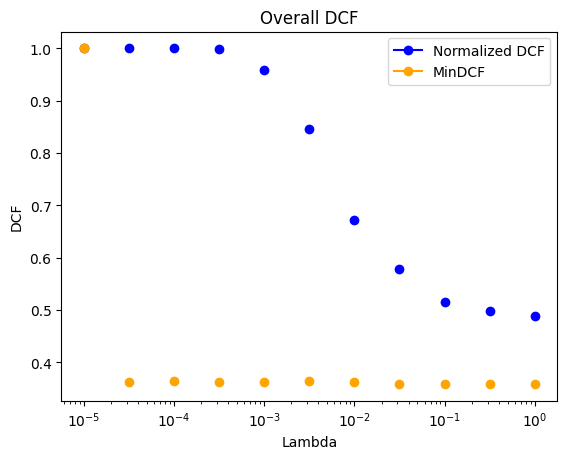

In [8]:
plot_overall_DCF(min_DCF_list_linear, DCF_norm_list_linear, C)

#### Linear SVM - Centered Data

In [9]:
X_train_std, mean, std = pp.standardize(X_train, return_params=True)
X_test_std = X_test - mean / std

In [10]:
min_DCF_list_linear_std = []
DCF_norm_list_linear_std = []

for c in C:
    print(f"C: {c}")
    model = SVMClassifier(C=c, K=K)
    folder = f"svm_linear_std_data_K_{K:.1e}_C_{c:.1e}".replace('.', '_').replace('e-0', 'e-')
    model.fit(X_train_std, y_train, folder, test_only)
    llr = model.score(X_test_std)
    min_DCF, _, DCF_norm = compute_statistics(llr, y_test, pi)
    min_DCF_list_linear_std.append(min_DCF)
    DCF_norm_list_linear_std.append(DCF_norm)

C: 1e-05
Model loaded successfully.
MinDCF: 1.0000, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 49.60%

C: 3.1622776601683795e-05
Model loaded successfully.
MinDCF: 0.3620, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 87.05%

C: 0.0001
Model loaded successfully.
MinDCF: 0.3640, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 86.95%

C: 0.00031622776601683794
Model loaded successfully.
MinDCF: 0.3630, DCF: 0.0999, Normalized DCF: 0.9990, Accuracy: 87.00%

C: 0.001
Model loaded successfully.
MinDCF: 0.3610, DCF: 0.0959, Normalized DCF: 0.9593, Accuracy: 87.10%

C: 0.0031622776601683794
Model loaded successfully.
MinDCF: 0.3650, DCF: 0.0845, Normalized DCF: 0.8452, Accuracy: 86.90%

C: 0.01
Model loaded successfully.
MinDCF: 0.3620, DCF: 0.0671, Normalized DCF: 0.6708, Accuracy: 87.05%

C: 0.03162277660168379
Model loaded successfully.
MinDCF: 0.3590, DCF: 0.0577, Normalized DCF: 0.5767, Accuracy: 87.20%

C: 0.1
Model loaded successfully.
MinDCF: 0.3582, DCF: 0.0515, Normalized DCF: 0

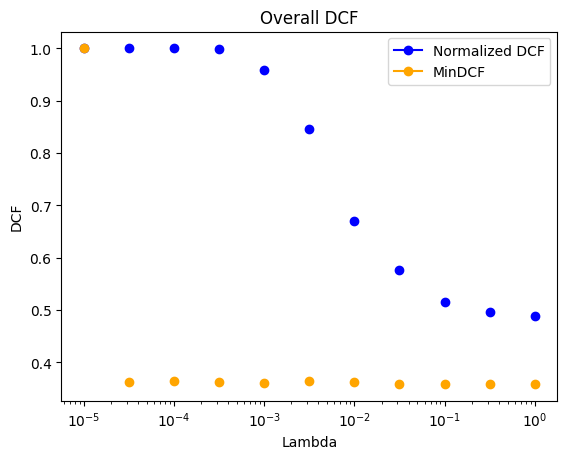

In [11]:
plot_overall_DCF(min_DCF_list_linear_std, DCF_norm_list_linear_std, C)

#### Poly Kernel SVM

In [12]:
d = 2
c = 1
eps = 0

In [13]:
min_DCF_list_poly = []
DCF_norm_list_poly = []

for ci in C:
    print(f"C: {ci}")
    model = SVMClassifierPolyKernel(C=ci, eps=eps, degree=d, delta=c)
    folder = f"svm_poly_raw_data_degree_{d}_delta_{c}_eps_{eps}_C_{ci:.1e}".replace('.', '_').replace('e-0', 'e-')
    model.fit(X_train, y_train, folder, test_only)
    llr = model.score(X_test)
    min_DCF, _, DCF_norm = compute_statistics(llr, y_test, pi)
    min_DCF_list_poly.append(min_DCF)
    DCF_norm_list_poly.append(DCF_norm)

C: 1e-05
Model loaded successfully.
MinDCF: 1.0000, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 49.60%

C: 3.1622776601683795e-05
Model loaded successfully.
MinDCF: 0.2455, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 91.70%

C: 0.0001
Model loaded successfully.
MinDCF: 0.2513, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 91.00%

C: 0.00031622776601683794
Model loaded successfully.
MinDCF: 0.2509, DCF: 0.0994, Normalized DCF: 0.9940, Accuracy: 89.80%

C: 0.001
Model loaded successfully.
MinDCF: 0.2565, DCF: 0.0920, Normalized DCF: 0.9196, Accuracy: 91.55%

C: 0.0031622776601683794
Model loaded successfully.
MinDCF: 0.2530, DCF: 0.0751, Normalized DCF: 0.7510, Accuracy: 90.10%

C: 0.01
Model loaded successfully.
MinDCF: 0.2528, DCF: 0.0588, Normalized DCF: 0.5884, Accuracy: 89.70%

C: 0.03162277660168379
Model loaded successfully.
MinDCF: 0.2455, DCF: 0.0467, Normalized DCF: 0.4674, Accuracy: 88.85%

C: 0.1
Model loaded successfully.
MinDCF: 0.2480, DCF: 0.0411, Normalized DCF: 0

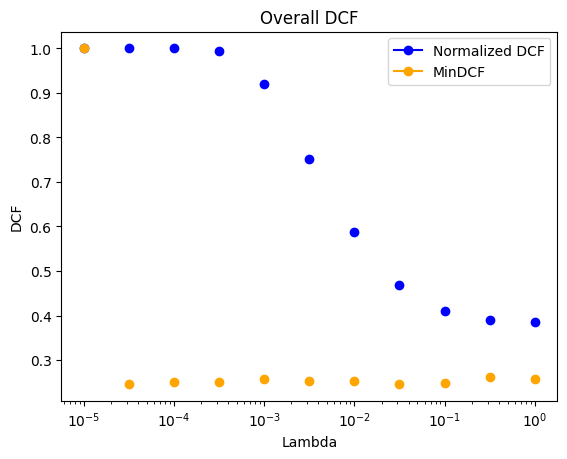

In [14]:
plot_overall_DCF(min_DCF_list_poly, DCF_norm_list_poly, C)

#### RBF Kernel SVM

In [15]:
import matplotlib.cm as cm

def plot_overall_DCF_rbf(min_DCFs, norm_DCFs, Cs, gammas):
    norm_cmap = cm.Blues  # Scale of blues for normalized DCF
    min_cmap = cm.Reds    # Scale of reds for minDCF

    # Get color scale based on the number of gammas
    colors_norm = norm_cmap(np.linspace(0.5, 1, len(gammas)))
    colors_min = min_cmap(np.linspace(0.5, 1, len(gammas))) 

    plt.figure(figsize=(10, 6))

    # Plot lines with colors
    for i, g in enumerate(gammas):
        plt.plot(Cs, norm_DCFs[g], marker='o', linestyle='-', color=colors_norm[i], label=f'Norm DCF (Gamma={g:.1e})')
        plt.plot(Cs, min_DCFs[g], marker='o', linestyle='-', color=colors_min[i], label=f'Min DCF (Gamma={g:.1e})')

    plt.xscale('log')
    plt.xlabel('C (log scale)')
    plt.ylabel('DCF')
    plt.title('Overall DCF by Gamma and C')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid()
    plt.show()

In [16]:
eps = 1.0
gamma = [1e-4, 1e-3, 1e-2, 1e-1]
C = np.logspace(-3, 2, 11)

In [17]:
min_DCF_list_rbf = {g: [] for g in gamma}
DCF_norm_list_rbf = {g: [] for g in gamma}

# all the possible combinations of gamma and C
for g in gamma:
    for c in C:
        print(f"Gamma: {g}, C: {c}")
        model = SVMClassifierRBFKernel(C=c, gamma=g, eps=eps)
        folder = f"svm_rbf_raw_data_gamma_{g:.1e}_eps_{eps}_C_{c:.1e}".replace('.', '_').replace('e-0', 'e-')
        model.fit(X_train, y_train, folder, test_only)
        llr = model.score(X_test)
        min_DCF, _, DCF_norm = compute_statistics(llr, y_test, pi)
        min_DCF_list_rbf[g].append(min_DCF)
        DCF_norm_list_rbf[g].append(DCF_norm)

Gamma: 0.0001, C: 0.001
Model loaded successfully.
MinDCF: 0.3640, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 86.95%

Gamma: 0.0001, C: 0.0031622776601683794
Model loaded successfully.
MinDCF: 0.3640, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 86.95%

Gamma: 0.0001, C: 0.01
Model loaded successfully.
MinDCF: 0.3640, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 86.95%

Gamma: 0.0001, C: 0.03162277660168379
Model loaded successfully.
MinDCF: 0.3640, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 86.95%

Gamma: 0.0001, C: 0.1
Model loaded successfully.
MinDCF: 0.3640, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 86.95%

Gamma: 0.0001, C: 0.31622776601683794
Model loaded successfully.
MinDCF: 0.3640, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 86.95%

Gamma: 0.0001, C: 1.0
Model loaded successfully.
MinDCF: 0.3631, DCF: 0.1000, Normalized DCF: 1.0000, Accuracy: 87.40%

Gamma: 0.0001, C: 3.1622776601683795
Model loaded successfully.
MinDCF: 0.3580, DCF: 0.0988, Normalized DCF

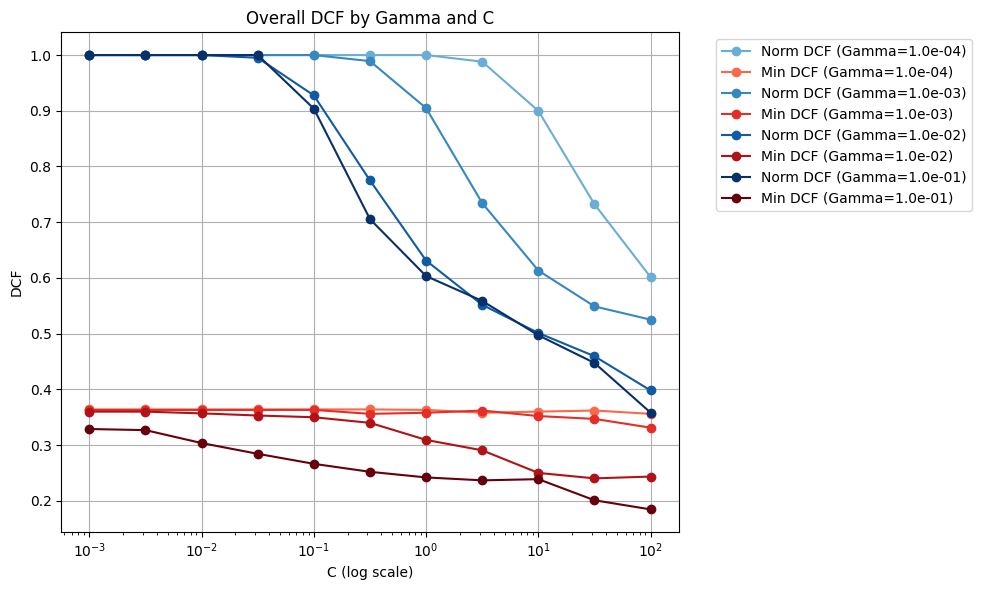

In [18]:
plot_overall_DCF_rbf(min_DCF_list_rbf, DCF_norm_list_rbf, C, gamma)